In [1]:
import pandas as pd


In [2]:
df=pd.read_csv('dataset.csv')

df

,Genero,Edad,pregunta,t_respuesta,min,max,promedio,audio,etiqueta
0,masculino,20.0,N,0.298,0.107,1.435,0.47060,audios/1.wav,0.0
1,masculino,20.0,N,0.107,0.107,1.435,0.47060,audios/2.wav,0.0
2,masculino,20.0,R1,0.240,0.107,1.435,0.47060,audios/3.wav,0.0
3,masculino,20.0,R1,0.347,0.107,1.435,0.47060,audios/4.wav,1.0
4,masculino,20.0,R2,1.435,0.107,1.435,0.47060,audios/5.wav,0.0
...,...,...,...,...,...,...,...,...,...
290,femenino,30.0,R3,0.333,0.041,2.257,0.48736,audios/291.wav,0.0
291,femenino,30.0,R2,0.121,0.041,2.257,0.48736,audios/292.wav,0.0
292,femenino,30.0,R1,0.041,0.041,2.257,0.48736,audios/293.wav,0.0
293,femenino,30.0,R4,0.217,0.041,2.257,0.48736,audios/294.wav,1.0


In [3]:
df = df.dropna(how="all")
df.to_csv("dataset.csv", index=False)

df

,Genero,Edad,pregunta,t_respuesta,min,max,promedio,audio,etiqueta
0,masculino,20.0,N,0.298,0.107,1.435,0.47060,audios/1.wav,0.0
1,masculino,20.0,N,0.107,0.107,1.435,0.47060,audios/2.wav,0.0
2,masculino,20.0,R1,0.240,0.107,1.435,0.47060,audios/3.wav,0.0
3,masculino,20.0,R1,0.347,0.107,1.435,0.47060,audios/4.wav,1.0
4,masculino,20.0,R2,1.435,0.107,1.435,0.47060,audios/5.wav,0.0
...,...,...,...,...,...,...,...,...,...
290,femenino,30.0,R3,0.333,0.041,2.257,0.48736,audios/291.wav,0.0
291,femenino,30.0,R2,0.121,0.041,2.257,0.48736,audios/292.wav,0.0
292,femenino,30.0,R1,0.041,0.041,2.257,0.48736,audios/293.wav,0.0
293,femenino,30.0,R4,0.217,0.041,2.257,0.48736,audios/294.wav,1.0


In [4]:
y_data= df['etiqueta']
x_data= df.drop(columns=['etiqueta'])

x_data

,Genero,Edad,pregunta,t_respuesta,min,max,promedio,audio
0,masculino,20.0,N,0.298,0.107,1.435,0.47060,audios/1.wav
1,masculino,20.0,N,0.107,0.107,1.435,0.47060,audios/2.wav
2,masculino,20.0,R1,0.240,0.107,1.435,0.47060,audios/3.wav
3,masculino,20.0,R1,0.347,0.107,1.435,0.47060,audios/4.wav
4,masculino,20.0,R2,1.435,0.107,1.435,0.47060,audios/5.wav
...,...,...,...,...,...,...,...,...
290,femenino,30.0,R3,0.333,0.041,2.257,0.48736,audios/291.wav
291,femenino,30.0,R2,0.121,0.041,2.257,0.48736,audios/292.wav
292,femenino,30.0,R1,0.041,0.041,2.257,0.48736,audios/293.wav
293,femenino,30.0,R4,0.217,0.041,2.257,0.48736,audios/294.wav


In [5]:
#sumar cuantos datos hay por cada etiqueta
val=y_data.unique()

val_counts=y_data.value_counts()
val_counts



etiqueta
0.0    170
1.0    125
Name: count, dtype: int64

In [6]:

x_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 295 entries, 0 to 294
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Genero       295 non-null    object 
 1   Edad         295 non-null    float64
 2   pregunta     295 non-null    object 
 3   t_respuesta  295 non-null    float64
 4   min          295 non-null    float64
 5   max          295 non-null    float64
 6   promedio     295 non-null    float64
 7   audio        295 non-null    object 
dtypes: float64(5), object(3)
memory usage: 18.6+ KB


In [7]:
import librosa
import numpy as np
import os

ruta=x_data['audio'].values

def extraer_caracteristicas(ruta):
    y, sr = librosa.load(ruta, sr=None)

    centroide = librosa.feature.spectral_centroid(y=y, sr=sr)
    banda = librosa.feature.spectral_bandwidth(y=y, sr=sr)
    rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr, roll_percent=0.85).mean()
    zcr = librosa.feature.zero_crossing_rate(y).mean()

    rms = librosa.feature.rms(y=y)
    rms_mean = np.mean(rms)
    rms_std = np.std(rms)

    f0, voiced_flag, voiced_probs = librosa.pyin(y, fmin=80, fmax=400)
    f0= f0[~np.isnan(f0)]
    pitch_mean = np.mean(f0) if len(f0) > 0 else 0
    pitch_std = np.std(f0) if len(f0) > 0 else 0

    jitter=pitch_std/pitch_mean if pitch_mean !=0 else 0
    shimer=rms_std/rms_mean if rms_mean !=0 else 0

    mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)
    mfcc1_mean = mfccs[0].mean()
    mfcc2_mean = mfccs[1].mean()  

    return [centroide, banda, rolloff, zcr, rms_mean, rms_std, pitch_mean, pitch_std, jitter, shimer, mfcc1_mean, mfcc2_mean]



In [8]:
caracteristicas = [extraer_caracteristicas(r) for r in ruta]

caracteristicas_df = pd.DataFrame(caracteristicas, columns=['spectral_centroid', 'spectral_bandwidth', 'spectral_rolloff',
                                                            'zero_crossing_rate', 'rms_mean', 'rms_std', 'pitch_mean',
                                                            'pitch_std', 'jitter', 'shimmer', 'mfcc1_mean', 'mfcc2_mean'])

caracteristicas_df


,spectral_centroid,spectral_bandwidth,spectral_rolloff,zero_crossing_rate,rms_mean,rms_std,pitch_mean,pitch_std,jitter,shimmer,mfcc1_mean,mfcc2_mean
0,"[[2762.6919875291414, 1884.4734266334272, 1362...","[[4365.677902899638, 3442.299500261674, 2537.9...",3248.697917,0.017795,0.014702,0.006895,0.000000,0.000000,0.000000,0.468976,-426.786926,192.193298
1,"[[3465.523698988626, 3383.5149203402166, 3575....","[[3831.2484742943757, 3397.883467503656, 3322....",6189.843750,0.103540,0.013372,0.005580,0.000000,0.000000,0.000000,0.417302,-377.529388,138.870697
2,"[[2765.7248309448973, 2327.7531907283183, 1858...","[[3865.357051088337, 3188.0527262010596, 2795....",4114.955357,0.039528,0.014979,0.007690,92.815789,11.928036,0.128513,0.513384,-401.303436,187.010727
3,"[[2934.459306520864, 2089.9607205856405, 1615....","[[4812.743062382197, 3546.8733200721454, 2608....",2832.031250,0.017985,0.020309,0.010661,0.000000,0.000000,0.000000,0.524965,-412.931091,198.439468
4,"[[2286.557619965446, 4688.285945417777, 6355.3...","[[3344.896520848138, 3812.3327542719267, 3711....",6184.442935,0.099121,0.015779,0.005822,91.272026,7.387647,0.080941,0.369013,-370.127625,133.044083
...,...,...,...,...,...,...,...,...,...,...,...,...
290,"[[2387.1438785438704, 2115.2616714323676, 2284...","[[4236.713528261808, 3715.1364063767255, 3643....",4006.009615,0.032677,0.006226,0.004586,89.805346,8.470273,0.094318,0.736503,-487.697968,173.866776
291,"[[5174.844492201579, 4838.182820979036, 4476.7...","[[5005.9592298492435, 4687.194149832217, 4262....",3592.548077,0.027882,0.007776,0.004330,90.386817,5.521651,0.061089,0.556783,-484.190643,174.753769
292,"[[3546.756529467323, 2787.5794302405516, 2241....","[[5371.316346208625, 4558.214538642343, 3640.3...",3957.208807,0.037287,0.007294,0.004531,87.769666,2.037673,0.023216,0.621147,-472.755157,175.628372
293,"[[2661.6065468467127, 2325.4301519689093, 3094...","[[4658.485073948638, 4053.5445348977155, 4841....",3140.625000,0.022906,0.009192,0.006809,92.356133,5.608320,0.060725,0.740680,-498.637939,184.049240


In [9]:
x_data=x_data.drop(columns=['audio'])

x_final = pd.concat([x_data.reset_index(drop=True), caracteristicas_df.reset_index(drop=True)], axis=1)

x_final

,Genero,Edad,pregunta,t_respuesta,min,max,promedio,spectral_centroid,spectral_bandwidth,spectral_rolloff,zero_crossing_rate,rms_mean,rms_std,pitch_mean,pitch_std,jitter,shimmer,mfcc1_mean,mfcc2_mean
0,masculino,20.0,N,0.298,0.107,1.435,0.47060,"[[2762.6919875291414, 1884.4734266334272, 1362...","[[4365.677902899638, 3442.299500261674, 2537.9...",3248.697917,0.017795,0.014702,0.006895,0.000000,0.000000,0.000000,0.468976,-426.786926,192.193298
1,masculino,20.0,N,0.107,0.107,1.435,0.47060,"[[3465.523698988626, 3383.5149203402166, 3575....","[[3831.2484742943757, 3397.883467503656, 3322....",6189.843750,0.103540,0.013372,0.005580,0.000000,0.000000,0.000000,0.417302,-377.529388,138.870697
2,masculino,20.0,R1,0.240,0.107,1.435,0.47060,"[[2765.7248309448973, 2327.7531907283183, 1858...","[[3865.357051088337, 3188.0527262010596, 2795....",4114.955357,0.039528,0.014979,0.007690,92.815789,11.928036,0.128513,0.513384,-401.303436,187.010727
3,masculino,20.0,R1,0.347,0.107,1.435,0.47060,"[[2934.459306520864, 2089.9607205856405, 1615....","[[4812.743062382197, 3546.8733200721454, 2608....",2832.031250,0.017985,0.020309,0.010661,0.000000,0.000000,0.000000,0.524965,-412.931091,198.439468
4,masculino,20.0,R2,1.435,0.107,1.435,0.47060,"[[2286.557619965446, 4688.285945417777, 6355.3...","[[3344.896520848138, 3812.3327542719267, 3711....",6184.442935,0.099121,0.015779,0.005822,91.272026,7.387647,0.080941,0.369013,-370.127625,133.044083
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
290,femenino,30.0,R3,0.333,0.041,2.257,0.48736,"[[2387.1438785438704, 2115.2616714323676, 2284...","[[4236.713528261808, 3715.1364063767255, 3643....",4006.009615,0.032677,0.006226,0.004586,89.805346,8.470273,0.094318,0.736503,-487.697968,173.866776
291,femenino,30.0,R2,0.121,0.041,2.257,0.48736,"[[5174.844492201579, 4838.182820979036, 4476.7...","[[5005.9592298492435, 4687.194149832217, 4262....",3592.548077,0.027882,0.007776,0.004330,90.386817,5.521651,0.061089,0.556783,-484.190643,174.753769
292,femenino,30.0,R1,0.041,0.041,2.257,0.48736,"[[3546.756529467323, 2787.5794302405516, 2241....","[[5371.316346208625, 4558.214538642343, 3640.3...",3957.208807,0.037287,0.007294,0.004531,87.769666,2.037673,0.023216,0.621147,-472.755157,175.628372
293,femenino,30.0,R4,0.217,0.041,2.257,0.48736,"[[2661.6065468467127, 2325.4301519689093, 3094...","[[4658.485073948638, 4053.5445348977155, 4841....",3140.625000,0.022906,0.009192,0.006809,92.356133,5.608320,0.060725,0.740680,-498.637939,184.049240


In [10]:
df_final = pd.concat([x_final.reset_index(drop=True), y_data.reset_index(drop=True)], axis=1)

df_final

,Genero,Edad,pregunta,t_respuesta,min,max,promedio,spectral_centroid,spectral_bandwidth,spectral_rolloff,zero_crossing_rate,rms_mean,rms_std,pitch_mean,pitch_std,jitter,shimmer,mfcc1_mean,mfcc2_mean,etiqueta
0,masculino,20.0,N,0.298,0.107,1.435,0.47060,"[[2762.6919875291414, 1884.4734266334272, 1362...","[[4365.677902899638, 3442.299500261674, 2537.9...",3248.697917,0.017795,0.014702,0.006895,0.000000,0.000000,0.000000,0.468976,-426.786926,192.193298,0.0
1,masculino,20.0,N,0.107,0.107,1.435,0.47060,"[[3465.523698988626, 3383.5149203402166, 3575....","[[3831.2484742943757, 3397.883467503656, 3322....",6189.843750,0.103540,0.013372,0.005580,0.000000,0.000000,0.000000,0.417302,-377.529388,138.870697,0.0
2,masculino,20.0,R1,0.240,0.107,1.435,0.47060,"[[2765.7248309448973, 2327.7531907283183, 1858...","[[3865.357051088337, 3188.0527262010596, 2795....",4114.955357,0.039528,0.014979,0.007690,92.815789,11.928036,0.128513,0.513384,-401.303436,187.010727,0.0
3,masculino,20.0,R1,0.347,0.107,1.435,0.47060,"[[2934.459306520864, 2089.9607205856405, 1615....","[[4812.743062382197, 3546.8733200721454, 2608....",2832.031250,0.017985,0.020309,0.010661,0.000000,0.000000,0.000000,0.524965,-412.931091,198.439468,1.0
4,masculino,20.0,R2,1.435,0.107,1.435,0.47060,"[[2286.557619965446, 4688.285945417777, 6355.3...","[[3344.896520848138, 3812.3327542719267, 3711....",6184.442935,0.099121,0.015779,0.005822,91.272026,7.387647,0.080941,0.369013,-370.127625,133.044083,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
290,femenino,30.0,R3,0.333,0.041,2.257,0.48736,"[[2387.1438785438704, 2115.2616714323676, 2284...","[[4236.713528261808, 3715.1364063767255, 3643....",4006.009615,0.032677,0.006226,0.004586,89.805346,8.470273,0.094318,0.736503,-487.697968,173.866776,0.0
291,femenino,30.0,R2,0.121,0.041,2.257,0.48736,"[[5174.844492201579, 4838.182820979036, 4476.7...","[[5005.9592298492435, 4687.194149832217, 4262....",3592.548077,0.027882,0.007776,0.004330,90.386817,5.521651,0.061089,0.556783,-484.190643,174.753769,0.0
292,femenino,30.0,R1,0.041,0.041,2.257,0.48736,"[[3546.756529467323, 2787.5794302405516, 2241....","[[5371.316346208625, 4558.214538642343, 3640.3...",3957.208807,0.037287,0.007294,0.004531,87.769666,2.037673,0.023216,0.621147,-472.755157,175.628372,0.0
293,femenino,30.0,R4,0.217,0.041,2.257,0.48736,"[[2661.6065468467127, 2325.4301519689093, 3094...","[[4658.485073948638, 4053.5445348977155, 4841....",3140.625000,0.022906,0.009192,0.006809,92.356133,5.608320,0.060725,0.740680,-498.637939,184.049240,1.0


In [ ]:
df_final.dtypes

Genero                 object
Edad                  float64
pregunta               object
t_respuesta           float64
min                   float64
max                   float64
promedio              float64
spectral_centroid      object
spectral_bandwidth     object
spectral_rolloff      float64
zero_crossing_rate    float64
rms_mean              float32
rms_std               float32
pitch_mean            float64
pitch_std             float64
jitter                float64
shimmer               float32
mfcc1_mean            float32
mfcc2_mean            float32
etiqueta              float64
dtype: object

In [14]:
for col in ["spectral_centroid", "spectral_bandwidth"]:
    df_final[col] = df_final[col].apply(lambda x: np.mean(x) if isinstance(x, (list, np.ndarray)) else x)

df_final.dtypes

Genero                 object
Edad                  float64
pregunta               object
t_respuesta           float64
min                   float64
max                   float64
promedio              float64
spectral_centroid     float64
spectral_bandwidth    float64
spectral_rolloff      float64
zero_crossing_rate    float64
rms_mean              float32
rms_std               float32
pitch_mean            float64
pitch_std             float64
jitter                float64
shimmer               float32
mfcc1_mean            float32
mfcc2_mean            float32
etiqueta              float64
dtype: object

C:\Users\sarao\AppData\Local\Temp\ipykernel_24556\1526529776.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_final, x="etiqueta", y="t_respuesta", palette="pastel", ax=axes[1, 0])


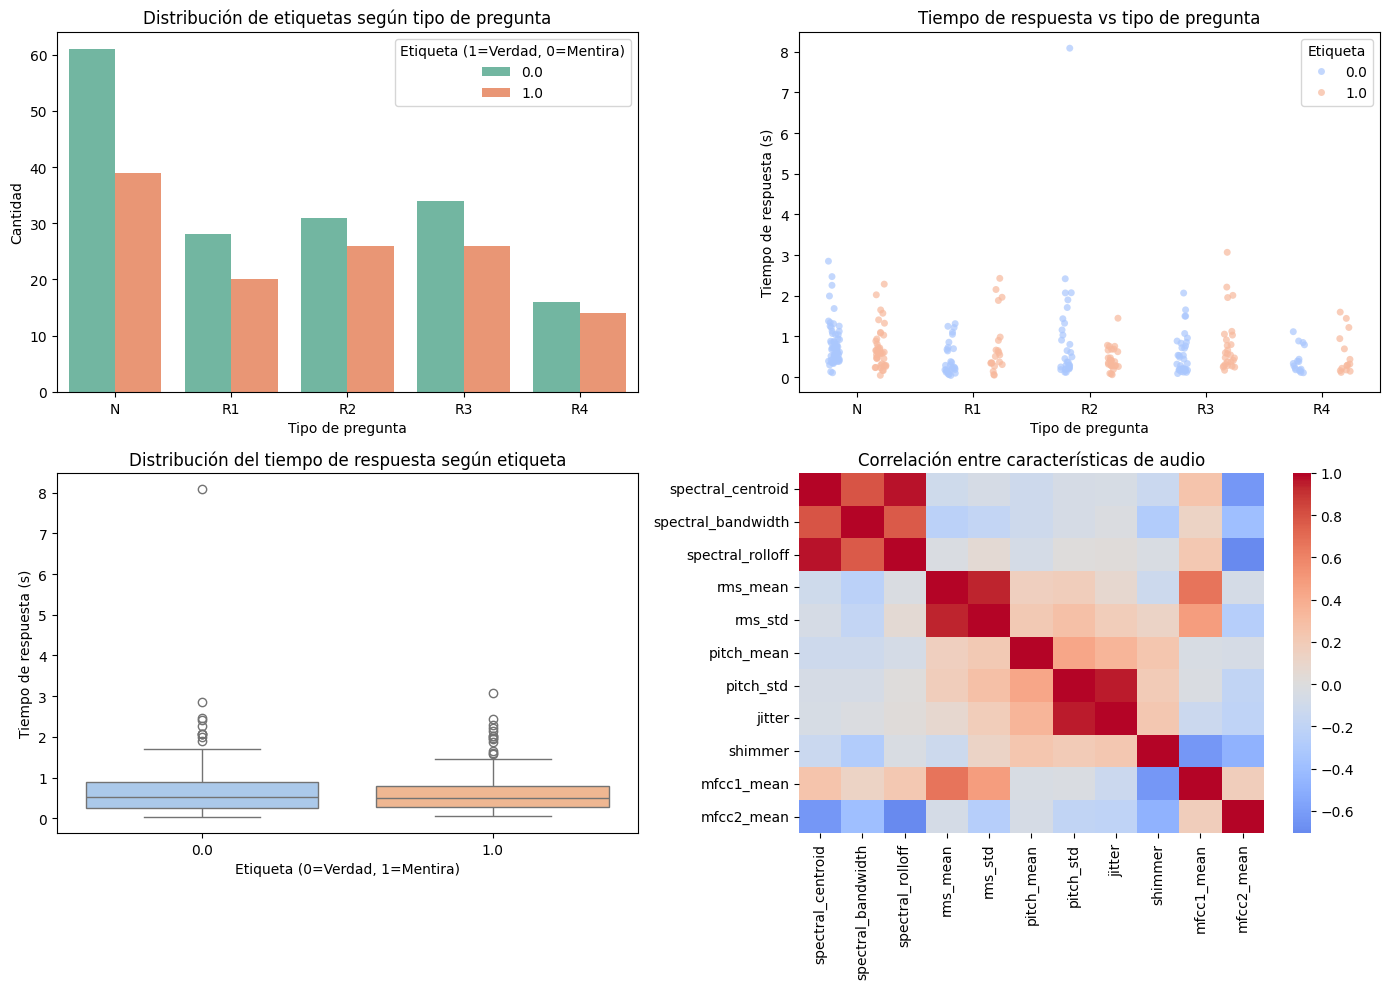

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns


fig, axes = plt.subplots(2, 2, figsize=(14, 10))
plt.subplots_adjust(hspace=0.4, wspace=0.3)


sns.countplot(data=df_final, x="pregunta", hue="etiqueta", palette="Set2", ax=axes[0, 0])
axes[0, 0].set_title("Distribución de etiquetas según tipo de pregunta")
axes[0, 0].set_xlabel("Tipo de pregunta")
axes[0, 0].set_ylabel("Cantidad")
axes[0, 0].legend(title="Etiqueta (1=Verdad, 0=Mentira)")


sns.stripplot(data=df_final, x="pregunta", y="t_respuesta",
              hue="etiqueta", jitter=True, dodge=True, alpha=0.7,
              palette="coolwarm", ax=axes[0, 1])
axes[0, 1].set_title("Tiempo de respuesta vs tipo de pregunta")
axes[0, 1].set_xlabel("Tipo de pregunta")
axes[0, 1].set_ylabel("Tiempo de respuesta (s)")
axes[0, 1].legend(title="Etiqueta")


sns.boxplot(data=df_final, x="etiqueta", y="t_respuesta", palette="pastel", ax=axes[1, 0])
axes[1, 0].set_title("Distribución del tiempo de respuesta según etiqueta")
axes[1, 0].set_xlabel("Etiqueta (0=Verdad, 1=Mentira)")
axes[1, 0].set_ylabel("Tiempo de respuesta (s)")


cols_audio = [c for c in df_final.columns if c.startswith(('spectral_','rms', 'pitch', 'jitter', 'shimmer', 'mfcc'))]
corr = df_final[cols_audio].corr()

sns.heatmap(corr, cmap="coolwarm", center=0, ax=axes[1, 1])
axes[1, 1].set_title("Correlación entre características de audio")

plt.tight_layout()
plt.show()


In [16]:
df_final = df_final[df_final["t_respuesta"] <= 4]

df_final

,Genero,Edad,pregunta,t_respuesta,min,max,promedio,spectral_centroid,spectral_bandwidth,spectral_rolloff,zero_crossing_rate,rms_mean,rms_std,pitch_mean,pitch_std,jitter,shimmer,mfcc1_mean,mfcc2_mean,etiqueta
0,masculino,20.0,N,0.298,0.107,1.435,0.47060,1714.831848,2925.670347,3248.697917,0.017795,0.014702,0.006895,0.000000,0.000000,0.000000,0.468976,-426.786926,192.193298,0.0
1,masculino,20.0,N,0.107,0.107,1.435,0.47060,3599.234930,3120.667730,6189.843750,0.103540,0.013372,0.005580,0.000000,0.000000,0.000000,0.417302,-377.529388,138.870697,0.0
2,masculino,20.0,R1,0.240,0.107,1.435,0.47060,2108.585741,2611.367064,4114.955357,0.039528,0.014979,0.007690,92.815789,11.928036,0.128513,0.513384,-401.303436,187.010727,0.0
3,masculino,20.0,R1,0.347,0.107,1.435,0.47060,1524.561401,2650.338083,2832.031250,0.017985,0.020309,0.010661,0.000000,0.000000,0.000000,0.524965,-412.931091,198.439468,1.0
4,masculino,20.0,R2,1.435,0.107,1.435,0.47060,3614.351561,3173.652667,6184.442935,0.099121,0.015779,0.005822,91.272026,7.387647,0.080941,0.369013,-370.127625,133.044083,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
290,femenino,30.0,R3,0.333,0.041,2.257,0.48736,2137.512820,3443.990209,4006.009615,0.032677,0.006226,0.004586,89.805346,8.470273,0.094318,0.736503,-487.697968,173.866776,0.0
291,femenino,30.0,R2,0.121,0.041,2.257,0.48736,1980.034677,3290.804073,3592.548077,0.027882,0.007776,0.004330,90.386817,5.521651,0.061089,0.556783,-484.190643,174.753769,0.0
292,femenino,30.0,R1,0.041,0.041,2.257,0.48736,2167.957705,3413.509306,3957.208807,0.037287,0.007294,0.004531,87.769666,2.037673,0.023216,0.621147,-472.755157,175.628372,0.0
293,femenino,30.0,R4,0.217,0.041,2.257,0.48736,1851.909746,3387.005973,3140.625000,0.022906,0.009192,0.006809,92.356133,5.608320,0.060725,0.740680,-498.637939,184.049240,1.0


In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline

cat_drop = ["Genero"]    
cat_full = ["pregunta"]  
num_cols = [c for c in df_final.columns if c not in cat_drop + cat_full + ["etiqueta"]]

preprocessor = ColumnTransformer([
    ("num", StandardScaler(), num_cols),
    ("cat_drop", OneHotEncoder(drop="first"), cat_drop),
    ("cat_full", OneHotEncoder(drop=None), cat_full)
])

pipeline = Pipeline([
    ("preprocess", preprocessor)
])


X_processed = pipeline.fit_transform(df_final.drop(columns=["etiqueta"]))

print("Forma final de los datos procesados:", X_processed.shape)

Forma final de los datos procesados: (294, 23)
